# Mount To Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task2: Feeling Classification (Classification Task)

## Get the Data

In [ ]:
feeling=pd.read_excel('/content/drive/MyDrive/Machine_Learning_Dataset/Raw dataset_MJH.xlsx')
bmi=pd.read_excel('/content/drive/MyDrive/Machine_Learning_Dataset/BMI Calculation_MJH.xlsx')

### Take a Look at the Data Structure

In [ ]:
new_column_names=['Sr','Gender','Age','Education_Level','Current_Living_Area','Monthly_Family_Income','University_Type','Height',
                  'BMI_Before_COVID','BMI_At_Present','Smoking_Habit','Eating_Large_Meals_or_Snacks','Physical_Exercise',
                  'Physical_Activity','Sound_Sleep_At_Night','Physical_Disturbance','Feeling_Lonely','Feeling_Depressed',
                  'Feeling_Anxious','Had_Suicidial_Thoughts','Had_Conflicts','Been_Abused']
feeling.columns=new_column_names

In [ ]:
feeling.head()

,Sr,Gender,Age,Education_Level,Current_Living_Area,Monthly_Family_Income,University_Type,Height,BMI_Before_COVID,BMI_At_Present,...,Physical_Exercise,Physical_Activity,Sound_Sleep_At_Night,Physical_Disturbance,Feeling_Lonely,Feeling_Depressed,Feeling_Anxious,Had_Suicidial_Thoughts,Had_Conflicts,Been_Abused
0,1,Male,≥ 25,4th/5th/Master’s/Higher,Urban,25 to 50 thousand,Public,167.64,24.908222,27.754876,...,Decreased,Decreased,Decreased,Increased,Yes,Yes,Yes,No,Yes,Yes
1,2,Female,22 to 24,4th/5th/Master’s/Higher,Urban,above 50 thousand,Public,154.94,21.244332,22.910554,...,Decreased,Decreased,Same as before COVID-19,Decreased,No,No,No,No,Yes,No
2,3,Female,22 to 24,4th/5th/Master’s/Higher,Urban,above 50 thousand,Public,152.40,18.944482,21.097264,...,Decreased,Decreased,Decreased,Increased,No,No,No,No,Yes,No
3,4,Female,22 to 24,4th/5th/Master’s/Higher,Urban,above 50 thousand,Public,154.94,20.411221,19.578110,...,Same as before COVID-19,Decreased,Decreased,Increased,Yes,Yes,Yes,Yes,Yes,Yes
4,5,Female,22 to 24,4th/5th/Master’s/Higher,Urban,above 50 thousand,Public,160.02,29.289552,30.461134,...,Decreased,Decreased,Decreased,Increased,No,Yes,Yes,No,No,No


In [ ]:
feeling.shape

(1602, 22)

In [ ]:
feeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sr                            1602 non-null   int64  
 1   Gender                        1602 non-null   object 
 2   Age                           1602 non-null   object 
 3   Education_Level               1602 non-null   object 
 4   Current_Living_Area           1602 non-null   object 
 5   Monthly_Family_Income         1602 non-null   object 
 6   University_Type               1602 non-null   object 
 7   Height                        1602 non-null   float64
 8   BMI_Before_COVID              1602 non-null   float64
 9   BMI_At_Present                1602 non-null   float64
 10  Smoking_Habit                 1602 non-null   object 
 11  Eating_Large_Meals_or_Snacks  1602 non-null   object 
 12  Physical_Exercise             1602 non-null   object 
 13  Phy

In [ ]:
feeling.duplicated().value_counts()

False    1602
dtype: int64

In [ ]:
#df1['Physical_Disturbance'].value_counts()

In [ ]:
#df1['Monthly_Family_Income'].value_counts()

In [ ]:
feeling1=feeling[['Current_Living_Area','Monthly_Family_Income','Smoking_Habit','Eating_Large_Meals_or_Snacks',
        'Physical_Exercise','Physical_Activity','Sound_Sleep_At_Night','Physical_Disturbance',
        'Feeling_Lonely','Feeling_Depressed','Feeling_Anxious','Had_Suicidial_Thoughts','Had_Conflicts',
        'Been_Abused']]

In [ ]:
feeling1.head()

,Current_Living_Area,Monthly_Family_Income,Smoking_Habit,Eating_Large_Meals_or_Snacks,Physical_Exercise,Physical_Activity,Sound_Sleep_At_Night,Physical_Disturbance,Feeling_Lonely,Feeling_Depressed,Feeling_Anxious,Had_Suicidial_Thoughts,Had_Conflicts,Been_Abused
0,Urban,25 to 50 thousand,No,Increased,Decreased,Decreased,Decreased,Increased,Yes,Yes,Yes,No,Yes,Yes
1,Urban,above 50 thousand,No,Increased,Decreased,Decreased,Same as before COVID-19,Decreased,No,No,No,No,Yes,No
2,Urban,above 50 thousand,No,Increased,Decreased,Decreased,Decreased,Increased,No,No,No,No,Yes,No
3,Urban,above 50 thousand,No,Decreased,Same as before COVID-19,Decreased,Decreased,Increased,Yes,Yes,Yes,Yes,Yes,Yes
4,Urban,above 50 thousand,No,Increased,Decreased,Decreased,Decreased,Increased,No,Yes,Yes,No,No,No


In [ ]:
feeling1.isnull().sum()

Current_Living_Area              0
Monthly_Family_Income            0
Smoking_Habit                    0
Eating_Large_Meals_or_Snacks     0
Physical_Exercise                0
Physical_Activity               12
Sound_Sleep_At_Night             0
Physical_Disturbance             0
Feeling_Lonely                   0
Feeling_Depressed                0
Feeling_Anxious                  0
Had_Suicidial_Thoughts           0
Had_Conflicts                    0
Been_Abused                      0
dtype: int64

## Discover and Visualize Data to Gain Insights

### Visualizing Geographical Data

<Axes: xlabel='Eating_Large_Meals_or_Snacks'>

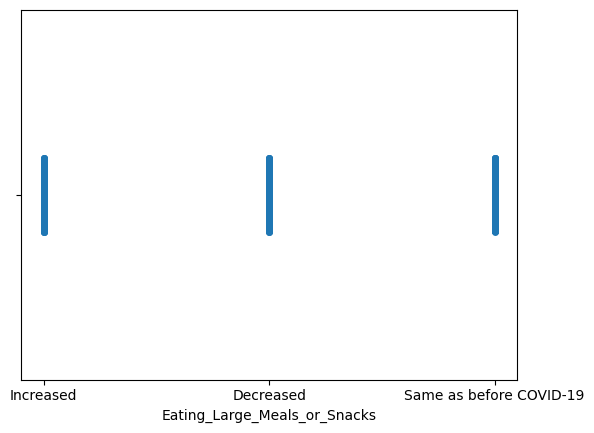

In [ ]:
sns.stripplot(data=feeling1, x="Eating_Large_Meals_or_Snacks")

### Looking For Correlations

In [ ]:
feeling1.corr()

<ipython-input-120-60cec74542f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feeling1.corr()


""


## Prepare Data For Machine Learning Algorithms

### Data Cleaning

In [ ]:
mode = feeling1["Physical_Activity"].mode()  # option 3
feeling1["Physical_Activity"].fillna(mode, inplace=True)

<ipython-input-121-66ef7bc6c60e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feeling1["Physical_Activity"].fillna(mode, inplace=True)


### Handling Categorical Attributes

#### Label Encoder


In [ ]:
#Label Encoding is a technique that is used to convert categorical columns into numerical
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

In [ ]:
feeling1.Current_Living_Area = label_encoder.fit_transform(feeling1.Current_Living_Area)
feeling1.Monthly_Family_Income = label_encoder.fit_transform(feeling1.Monthly_Family_Income)
feeling1.Smoking_Habit = label_encoder.fit_transform(feeling1.Smoking_Habit)
feeling1.Eating_Large_Meals_or_Snacks = label_encoder.fit_transform(feeling1.Eating_Large_Meals_or_Snacks)
feeling1.Physical_Exercise = label_encoder.fit_transform(feeling1.Physical_Exercise)
feeling1.Physical_Activity = label_encoder.fit_transform(feeling1.Physical_Activity)
feeling1.Sound_Sleep_At_Night = label_encoder.fit_transform(feeling1.Sound_Sleep_At_Night)
feeling1.Physical_Disturbance = label_encoder.fit_transform(feeling1.Physical_Disturbance)
feeling1.Feeling_Lonely = label_encoder.fit_transform(feeling1.Feeling_Lonely)
feeling1.Feeling_Depressed = label_encoder.fit_transform(feeling1.Feeling_Depressed)
feeling1.Feeling_Anxious = label_encoder.fit_transform(feeling1.Feeling_Anxious)
feeling1.Had_Suicidial_Thoughts = label_encoder.fit_transform(feeling1.Had_Suicidial_Thoughts)
feeling1.Had_Conflicts = label_encoder.fit_transform(feeling1.Had_Conflicts)
feeling1.Been_Abused = label_encoder.fit_transform(feeling1.Been_Abused)

<ipython-input-123-98c37bb68b10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feeling1.Current_Living_Area = label_encoder.fit_transform(feeling1.Current_Living_Area)
<ipython-input-123-98c37bb68b10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feeling1.Monthly_Family_Income = label_encoder.fit_transform(feeling1.Monthly_Family_Income)
<ipython-input-123-98c37bb68b10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [ ]:
feeling1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Current_Living_Area           1602 non-null   int64
 1   Monthly_Family_Income         1602 non-null   int64
 2   Smoking_Habit                 1602 non-null   int64
 3   Eating_Large_Meals_or_Snacks  1602 non-null   int64
 4   Physical_Exercise             1602 non-null   int64
 5   Physical_Activity             1602 non-null   int64
 6   Sound_Sleep_At_Night          1602 non-null   int64
 7   Physical_Disturbance          1602 non-null   int64
 8   Feeling_Lonely                1602 non-null   int64
 9   Feeling_Depressed             1602 non-null   int64
 10  Feeling_Anxious               1602 non-null   int64
 11  Had_Suicidial_Thoughts        1602 non-null   int64
 12  Had_Conflicts                 1602 non-null   int64
 13  Been_Abused                   160

<Axes: >

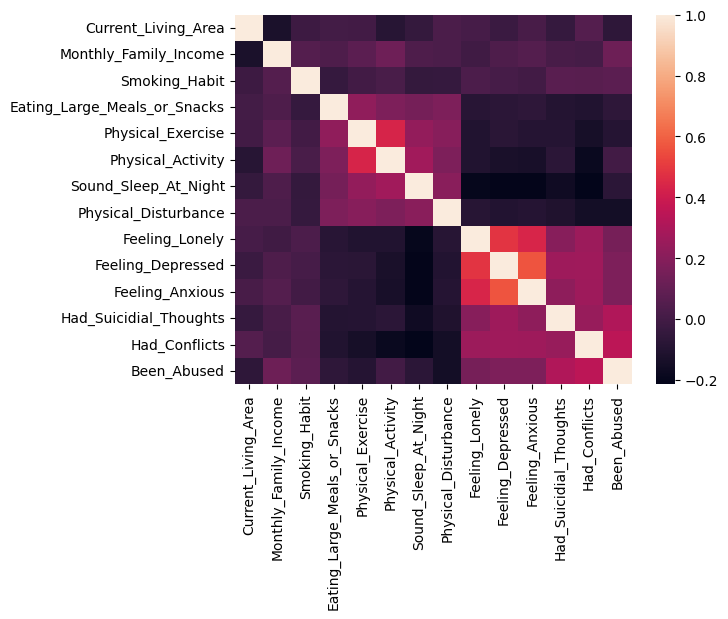

In [ ]:
sns.heatmap(feeling1.corr())

## Select and Train Model

### Create a Test set

In [ ]:
feeling1.shape

(1602, 14)

In [ ]:
X = feeling1.drop('Feeling_Depressed', axis=1)
y = feeling1.Feeling_Depressed

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Logistic Regression

#### Training and Evoulution on the Training Set

In [ ]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.1,random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=0)

In [ ]:
feeling1_predictions = log_reg.predict(X_test)
feeling1_predictions[:5]

array([1, 1, 1, 1, 1])

In [ ]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,feeling1_predictions))

The accuracy of the Logistic Regression is 0.8286604361370716


In [ ]:
from sklearn.metrics import precision_score
print('The precision of the Logistic Regression is',precision_score(y_test,feeling1_predictions))

The precision of the Logistic Regression is 0.8482490272373541


In [ ]:
from sklearn.metrics import recall_score
print('The recall of the Logistic Regression is',recall_score(y_test,feeling1_predictions))

The recall of the Logistic Regression is 0.9316239316239316


In [ ]:
from sklearn.metrics import f1_score
print('The f1_score of the Logistic Regression is',f1_score(y_test,feeling1_predictions))

The f1_score of the Logistic Regression is 0.8879837067209776


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
log_confusion = confusion_matrix(y_test, feeling1_predictions)

In [ ]:
y_test.value_counts()

1    234
0     87
Name: Feeling_Depressed, dtype: int64

In [ ]:
len(feeling1_predictions)

321

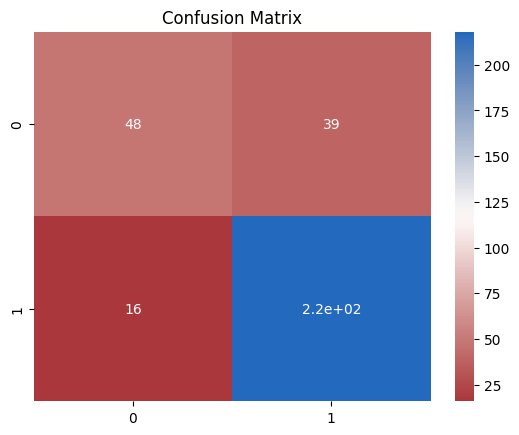

In [ ]:
sns.heatmap(log_confusion, annot=True, cmap="vlag_r")
plt.title("Confusion Matrix");

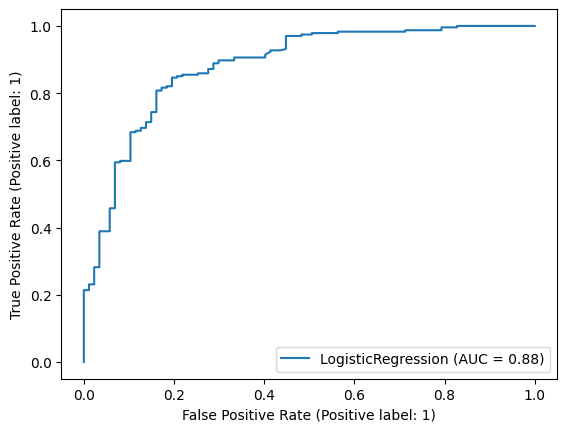

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)

### Support Vector Machine

#### Training and Evoulution on the Training Set

In [ ]:
from sklearn import svm  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
svm = svm.SVC(C=0.1,kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=0.1)

In [ ]:
feeling1_predictions = svm.predict(X_test)
feeling1_predictions[:5]

array([1, 1, 1, 1, 1])

In [ ]:
print('The accuracy of the SVM is',metrics.accuracy_score(y_test,feeling1_predictions))

The accuracy of the SVM is 0.8442367601246106


In [ ]:
from sklearn.metrics import precision_score
print('The precision of the SVM is',precision_score(y_test,feeling1_predictions))

The precision of the SVM is 0.8382352941176471


In [ ]:
from sklearn.metrics import recall_score
print('The recall of the SVM is',recall_score(y_test,feeling1_predictions))

The recall of the SVM is 0.9743589743589743


In [ ]:
from sklearn.metrics import f1_score
print('The f1_score of the SVM is',f1_score(y_test,feeling1_predictions))

The f1_score of the SVM is 0.9011857707509882


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
svm_confusion = confusion_matrix(y_test, feeling1_predictions)

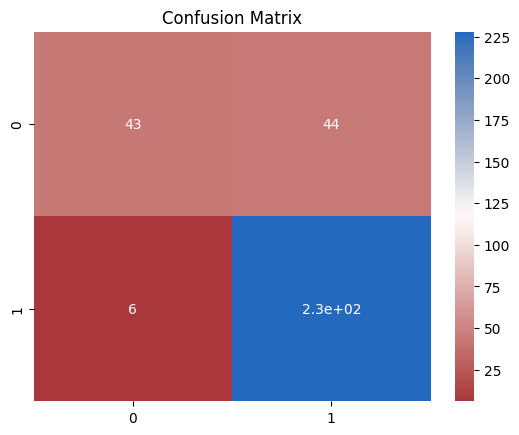

In [ ]:
sns.heatmap(svm_confusion, annot=True, cmap="vlag_r")
plt.title("Confusion Matrix");

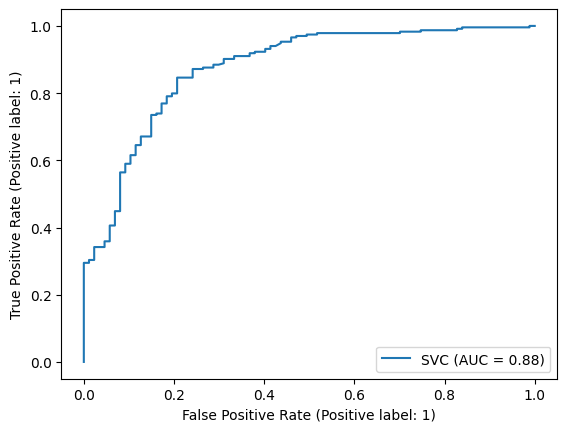

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(svm, X_test, y_test)

### Better Evolution Using Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

log_cv = cross_val_score(log_reg, X, y, cv=10)

In [ ]:
pd.Series(log_cv).describe()

count    10.000000
mean      0.832089
std       0.045764
min       0.712500
25%       0.827640
50%       0.846875
75%       0.854687
max       0.875000
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

svm_cv = cross_val_score(svm, X, y,cv=10)

In [ ]:
pd.Series(svm_cv).describe()

count    10.000000
mean      0.834600
std       0.048979
min       0.712500
25%       0.816770
50%       0.853125
75%       0.865625
max       0.881250
dtype: float64